# Lab 2
## Part 1 LIGO Antenna Patterns

In [1]:
%matplotlib widget

from lab_2.ligo_antenna import *

# Plot the antenna patterns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a spherical grid
r = 1
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Convert spherical coordinates to Cartesian coordinates for plotting
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Calculate the antenna patterns
f_plus_values = np.abs(f_plus(theta, phi))
f_cross_values = np.abs(f_cross(theta, phi))

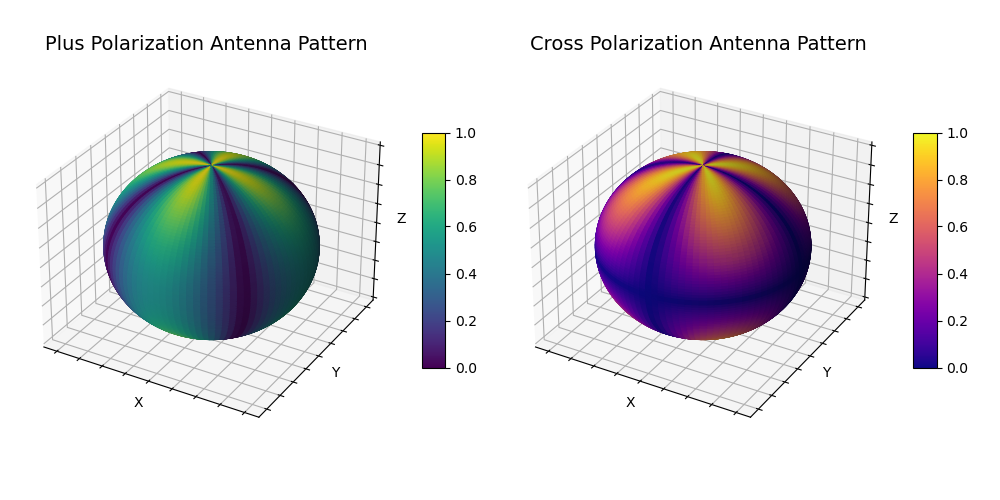

In [2]:
# Heatmap for plus and cross polarizations
from matplotlib.cm import ScalarMappable

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, facecolors=plt.cm.viridis(f_plus_values), rstride=1, cstride=1)
ax1.set_title('Plus Polarization Antenna Pattern', fontsize=14)
ax1.set_xlabel('X', labelpad=-10, fontsize=10)
ax1.set_ylabel('Y', labelpad=-10, fontsize=10)
ax1.set_zlabel('Z', labelpad=-10, fontsize=10)
plt.colorbar(ScalarMappable(cmap='viridis'), ax=ax1, shrink=0.5, aspect=10)
ax1.tick_params(label1On=False)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, facecolors=plt.cm.plasma(f_cross_values), rstride=1, cstride=1)
ax2.set_title('Cross Polarization Antenna Pattern', fontsize=14)
ax2.set_xlabel('X', labelpad=-10, fontsize=10)
ax2.set_ylabel('Y', labelpad=-10, fontsize=10)
ax2.set_zlabel('Z', labelpad=-10, fontsize=10)
plt.colorbar(ScalarMappable(cmap='plasma'), ax=ax2, shrink=0.5, aspect=10)
ax2.tick_params(label1On=False)

plt.tight_layout()
plt.show()

### Use tensors to derive the antenna patterns

We use the detector frame. In the frame, the detector arm unit vectors are $\hat{n}_X = (1,0,0)$ and $\hat{n}_Y=(0,1,0)$. The source direction vector for polar angles $(\theta, \phi)$ is $\hat{n} = (\sin\theta\cos\phi, \sin\theta\sin\phi, \cos\theta)$.

For polarization calculation, we need to derive the expressions of the unit vectors of the wave frame in the detector frame.
$$
\hat{x} \propto \hat{Z}\times \hat{n} = (0,0,1)\times (\sin\theta\cos\phi, \sin\theta\sin\phi, \cos\theta) = (-\sin\theta\sin\phi, \sin\theta\cos\phi, 0) \\
\hat{x} = (-\sin\phi, \cos\phi, 0) \\
\hat{y} \propto \hat{x}\times \hat{n} = (-\sin\phi, \cos\phi, 0) \times (\sin\theta\cos\phi, \sin\theta\sin\phi, \cos\theta) = (\cos\theta\cos\phi, \cos\theta\sin\phi, -\sin\theta) \\
\hat{y} = (\cos\theta\cos\phi, \cos\theta\sin\phi, -\sin\theta)
$$
The polarization tensors are then
$$
e_+ = \hat{x} \otimes \hat{x} - \hat{y} \otimes \hat{y} = \begin{pmatrix} \sin^2\phi-\cos^2\theta\cos^2\phi & -(1+\cos^2\theta)\sin\phi\cos\phi & \sin\theta\cos\theta\cos\phi \\ -(1+\cos^2\theta)\sin\phi\cos\phi & \cos^2\phi - \cos^2\theta\sin^2\phi & \sin\theta\cos\theta\sin\phi \\ \sin\theta\cos\theta\cos\phi & \sin\theta\cos\theta\sin\phi & -\sin^2\theta \end{pmatrix} \\
e_\times =  \hat{x} \otimes \hat{y} + \hat{y} \otimes \hat{x} = \begin{pmatrix} -\cos\theta\sin 2\phi & \cos\theta\cos 2\phi & \sin\theta\sin\phi \\ \cos\theta\cos 2\phi & \cos\theta\sin 2\phi & -\sin\theta\cos\phi \\ \sin\theta\sin\phi & -\sin\theta\cos\phi & 0 \end{pmatrix}
$$

In the detector frame, the detector tensor is then
$$
D = \frac{1}{2}(\hat{n}_X \otimes \hat{n}_X - \hat{n}_Y \otimes \hat{n}_Y) = \frac{1}{2}\begin{pmatrix}1 & 0 & 0 \\ 0 & -1 &0 \\ 0 & 0 & 0\end{pmatrix}.
$$
Hence we get the antenna patterns
$$
F_+ = D:e_+ = \frac{1}{2}(1+\cos^2\theta)(\sin^2\phi - \cos^2\phi) = -\frac{1}{2}(1+\cos^2\theta)\cos 2\phi \\
F_\times = D:e_\times = -\cos\theta\sin 2\phi
$$
The expressions differ from that in the lecture slides by a minus sign, and this can be fixed by rotating $\phi$ by $\pi/2$.

We can also numerically calculate the antenna patterns following the same procedure.

In [3]:
f_plus_numerical, f_cross_numerical = np.abs(antenna_patterns_numerical(theta, phi, psi=np.pi/6))

/Users/zhaoxinmiao/Documents/Files/Research/data_science_course/LZU_lab/lab_2/ligo_antenna.py:38: RuntimeWarning: invalid value encountered in divide
  x_wave /= np.linalg.norm(x_wave, axis=-1, keepdims=True)


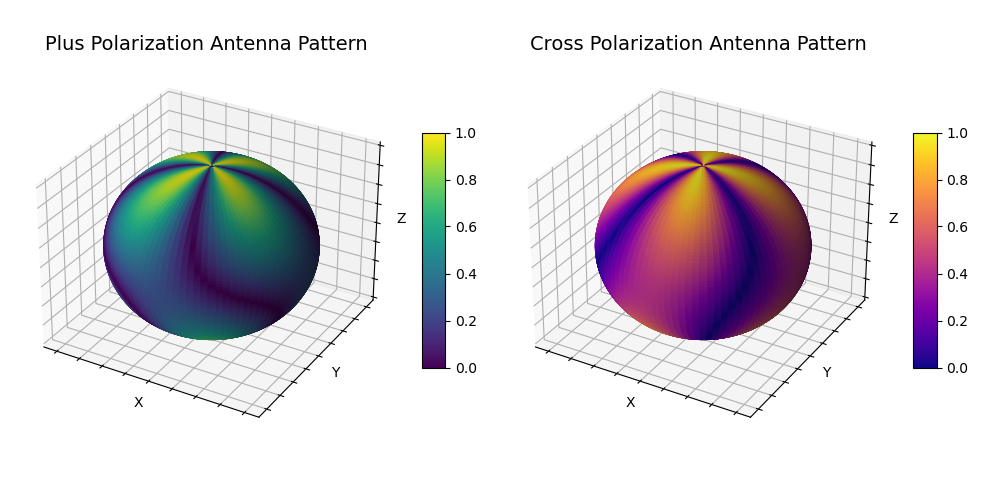

In [4]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, facecolors=plt.cm.viridis(f_plus_numerical), rstride=1, cstride=1)
ax1.set_title('Plus Polarization Antenna Pattern', fontsize=14)
ax1.set_xlabel('X', labelpad=-10, fontsize=10)
ax1.set_ylabel('Y', labelpad=-10, fontsize=10)
ax1.set_zlabel('Z', labelpad=-10, fontsize=10)
plt.colorbar(ScalarMappable(cmap='viridis'), ax=ax1, shrink=0.5, aspect=10)
ax1.tick_params(label1On=False)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, facecolors=plt.cm.plasma(f_cross_numerical), rstride=1, cstride=1)
ax2.set_title('Cross Polarization Antenna Pattern', fontsize=14)
ax2.set_xlabel('X', labelpad=-10, fontsize=10)
ax2.set_ylabel('Y', labelpad=-10, fontsize=10)
ax2.set_zlabel('Z', labelpad=-10, fontsize=10)
plt.colorbar(ScalarMappable(cmap='plasma'), ax=ax2, shrink=0.5, aspect=10)
ax2.tick_params(label1On=False)

plt.tight_layout()
plt.show()

### Introducing the polarization angle

For the antenna patterns with an arbitrary polarization angle $\psi$, we can directly perform a rotation in the wave frame. We introduce a new polarization basis
$$
\hat{p} = \cos\psi \hat{x} + \sin\psi \hat{y}, \\
\hat{q} = -\sin\psi \hat{x} + \cos\psi \hat{y}.
$$

The polarization tensors in this basis are
$$
e_+' = \hat{p}\otimes\hat{q} - \hat{q}\otimes\hat{q}, \\
e_\times' = \hat{p}\otimes\hat{q} + \hat{q}\otimes\hat{p}.
$$

Because
$$
\hat{p}\otimes\hat{p} = \cos^2\psi \hat{x}\otimes\hat{x} + \sin^2\psi \hat{y}\otimes\hat{y} + \sin\psi\cos\psi (\hat{x}\otimes\hat{y} + \hat{y}\otimes\hat{x}), \\
\hat{q}\otimes\hat{q} = \sin^2\psi \hat{x}\otimes\hat{x} + \cos^2\psi \hat{y}\otimes\hat{y} - \sin\psi\cos\psi (\hat{x}\otimes\hat{y} + \hat{y}\otimes\hat{x}),
$$
we find
$$
e_+' = \cos 2\psi (\hat{x}\otimes\hat{x} - \hat{y}\otimes\hat{y}) + \sin 2\psi(\hat{x}\otimes\hat{y} + \hat{y}\otimes\hat{x}) = \cos 2\psi e_+ + \sin 2\psi e_\times.
$$
Similarly,
$$
e_\times' = -\sin 2\psi e_+ + \cos 2\psi e_\times.
$$
These differ from the original polarization tensors by a rotation of angle $2\psi$.

Hence by tensor contraction we have the new antenna patterns
$$
F_+' = F_+ \cos 2\psi + F_\times \sin 2\psi, \\
F_\times' = -F_+ \sin 2\psi + F_\times \cos 2\psi.
$$

### Strain signal from a non-evolving binary

In [12]:
from lab_1.signal import *

# Generate a sample signal
A, B = 1, 0.5
f0 = 10  # Frequency in Hz
phi0 = np.pi / 4  # Phase in radians
sample_rate = 10*f0  # Sample rate in Hz
duration = 5  # Duration in seconds
t = np.arange(0, duration, 1/sample_rate)
h_plus = generate_sinusoidal(t, A, f0, 0)
h_cross = generate_sinusoidal(t, B, f0, phi0)

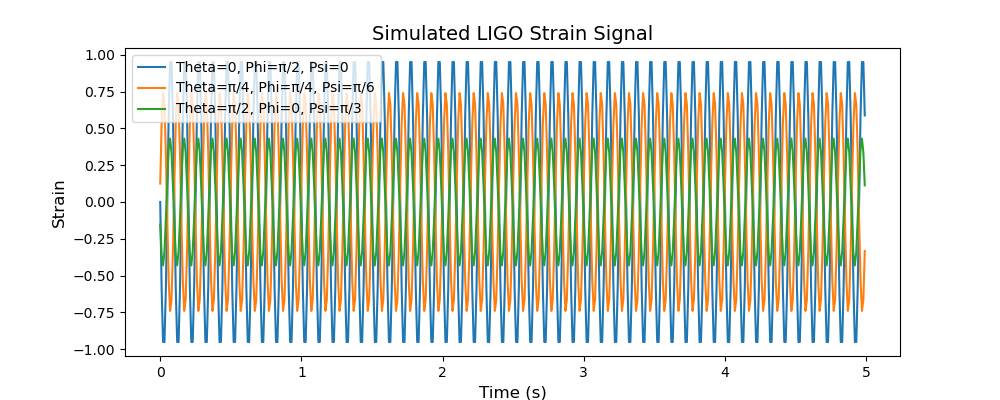

In [14]:
strain_1 = ligo_strain(h_plus, h_cross, theta=0, phi=np.pi/2, psi=0)
strain_2 = ligo_strain(h_plus, h_cross, theta=np.pi/4, phi=np.pi/4, psi=np.pi/6)
strain_3 = ligo_strain(h_plus, h_cross, theta=np.pi/2, phi=0, psi=np.pi/3)

plt.figure(figsize=(10, 4))
plt.plot(t, strain_1, label='Theta=0, Phi=π/2, Psi=0')
plt.plot(t, strain_2, label='Theta=π/4, Phi=π/4, Psi=π/6')
plt.plot(t, strain_3, label='Theta=π/2, Phi=0, Psi=π/3')
plt.title('Simulated LIGO Strain Signal', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.legend()
plt.show()